# Linear Regression

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0,10.0) 

In [31]:
# Reading the data
data = pd.read_csv(r'C:/data/headbrain.csv')
data.shape

(237, 4)

In [4]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [36]:
# Collecting x and y
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [41]:
# Mean X and Y
mean_x = np.mean(X) # mean is a predefined function in numpy
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
numer = 0
denom =0
for i in range(n):
    numer += (X[i] - mean_x)*(Y[i] - mean_y) # SXY
    denom +=(X[i] - mean_x)**2 # SXX
b1 = numer / denom
b0 = mean_y - (b1*mean_x)
print(b1,b0)


0.26342933948939945 325.57342104944223


<function matplotlib.pyplot.show(*args, **kw)>

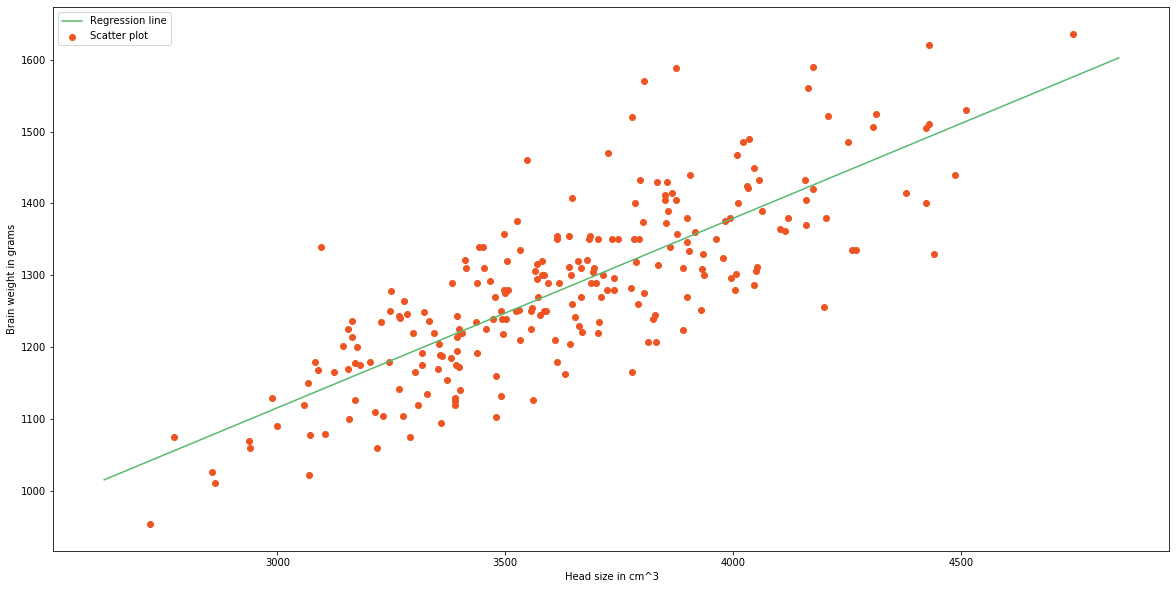

In [42]:
# Plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1*x

# Ploting line
plt.plot(x, y,color='#58b970', label='Regression line')
# Ploting scatter points
plt.scatter(X, Y, c='#ef5423', label='Scatter plot')

plt.xlabel('Head size in cm^3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show

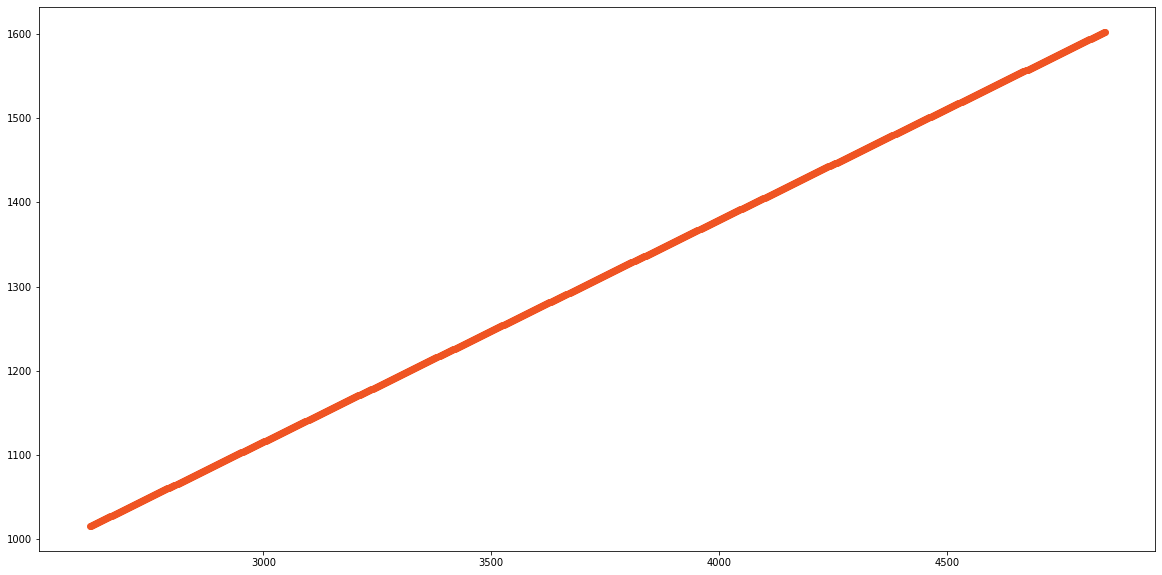

In [43]:
plt.scatter(x, y, c='#ef5423', label='Scatter plot')


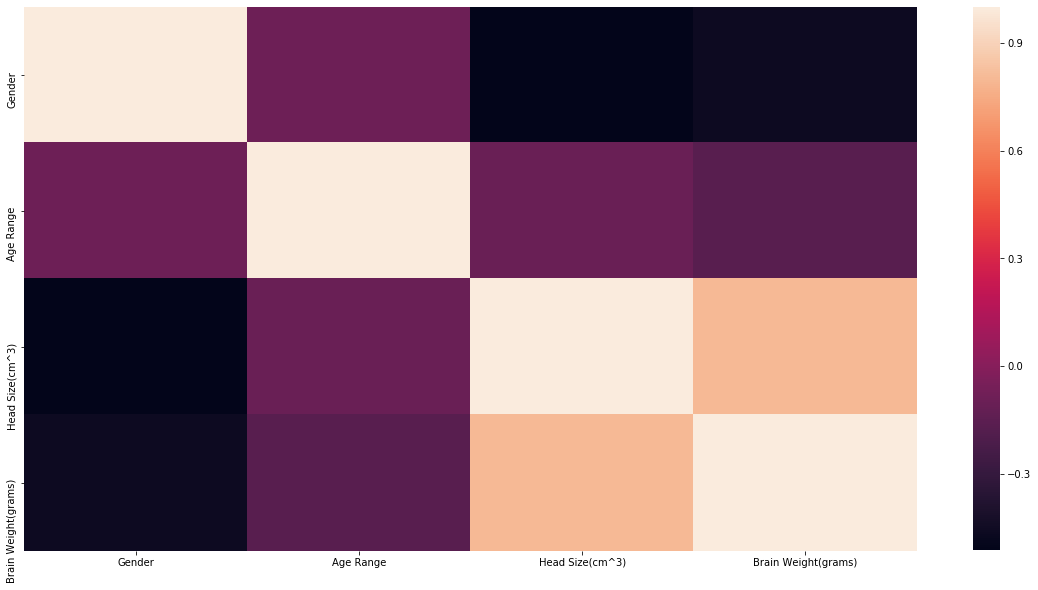

In [21]:
sns.heatmap(data.corr())

In [45]:
# To find the goodness of fit using r squared
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    ss_t +=(Y[i] - mean_y)**2
    ss_r +=(Y[i] - y_pred)**2
    r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


##### Machine learning with sklearn module

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Cannot use rank 1 matrix in scikit learn
X = X.reshape((n, 1))
# Creating model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X,Y)
# Predict y
Y_pred = reg.predict(X)

#Calculating RMSE and R2 score
mse =mean_squared_error(Y,Y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(X,Y)
print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
